Today's tutorial will cover:
  * NumPy,
  * PyPlot, and,
  * NumPy Random

In [4]:
import math as m
import numpy as np
from matplotlib import pyplot as plt
import numpy.random as random

**Exercise 1**

Write a function that takes a numpy array as input, and returns a numpy array consisting of only the negative values of the given array.

In [5]:
# how would we do this for a python list?
def neg_list(python_list):
    output = []
    for entry in python_list:
        if entry < 0:
            output.append(entry)
    return output

In [6]:
a = np.array([1, 2])
b = [True, False]
print(a[b])

[1]


In [7]:
def neg_array(np_arr):
    negatives = np_arr < 0
#     print(negatives)
    return np_arr[negatives]

In [8]:
arr_1 = np.array([-1, 1, -2, 2, 0])
arr_2 = np.arange(-10, 10, 2)
arr_3 = np.array(0)

In [9]:
print(neg_array(arr_1))
print(neg_array(arr_2))
print(neg_array(arr_3))

[-1 -2]
[-10  -8  -6  -4  -2]
[]


**Exercise 2**

Write a function that takes a one-dimensional numpy array and two numbers, `m` and `n`.
If possible, reshape the array to have dimensions `(m, n)`.
If it is not possible to reshape, return `False`.

In [8]:
def reshape_arr(array, m, n):
    if m * n == len(array):
        return array.reshape(m, n)
    else:
        return False

In [9]:
# what if i don't know the necessary condition is m * n == len(array)?
# python can handle the error for us...
def reshape_arr_2(array, m, n):
    try:
        return array.reshape(m, n)
    except:
        return False

In [10]:
arr_1 = np.arange(1, 10)
print(arr_1, "\n")

print(reshape_arr(arr_1, 3, 3))
print(reshape_arr_2(arr_1, 3, 3), "\n")

print(reshape_arr(arr_1, 5, 5))
print(reshape_arr_2(arr_1, 5, 5))

[1 2 3 4 5 6 7 8 9] 

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]
 [7 8 9]] 

False
False


**Exercise 3**

Write a function that takes a numpy array of unspecified dimension and returns a one-dimensional numpy array with all the elements in the same order.

This is similar to question 4 from homework 1, except we cannot have nested arrays like we can without numpy (arrays like `[1, 2, [3, [4]]]` don't work well in numpy)

In [11]:
def flatten_array(array):
    return array.flatten()

In [12]:
a = np.array([[1, 2], [3, 4]])
b = np.array([np.arange(1,9), np.arange(9, 17), np.arange(17, 25)])

print(a, "\n")
print(b, "\n")

print(flatten_array(a))
print(flatten_array(b))

[[1 2]
 [3 4]] 

[[ 1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16]
 [17 18 19 20 21 22 23 24]] 

[1 2 3 4]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


**Exercise 4**

Write a function that takes a numpy matrix and returns the same matrix, but with all of the border entries replaced with `0`.
The function should work for matrices of size `1 x 1` or greater.

In [13]:
def push_zeroes(mat):
    mat[:, 0] = 0
    mat[:, -1] = 0
    mat[0, :] = 0
    mat[-1, :] = 0
    return mat

In [14]:
# mat_a = np.ones((10, 10))
# print(mat_a, "\n")
# print(push_zeroes(mat_a))

# mat_b = np.eye(7)
# print(mat_b, "\n")
# print(push_zeroes(mat_b))

mat_c = 5 * np.ones((5, 5))
mat_c += np.eye(5)
print(mat_c, "\n")
print(push_zeroes(mat_c))

[[6. 5. 5. 5. 5.]
 [5. 6. 5. 5. 5.]
 [5. 5. 6. 5. 5.]
 [5. 5. 5. 6. 5.]
 [5. 5. 5. 5. 6.]] 

[[0. 0. 0. 0. 0.]
 [0. 6. 5. 5. 0.]
 [0. 5. 6. 5. 0.]
 [0. 5. 5. 6. 0.]
 [0. 0. 0. 0. 0.]]


**Exercise 5**

Plot the following piecewise function.

$$ h(x)=   \left\{
\begin{array}{ll}
      xe^{-x/3} & -1 < x < 1 \\
      e^{-x/10}\text{sin}(2\pi x) - 1 & 1 < x < 8 \\
      (x-8)^3 - 5 & 8 < x < 10 \\
\end{array} 
\right.  $$

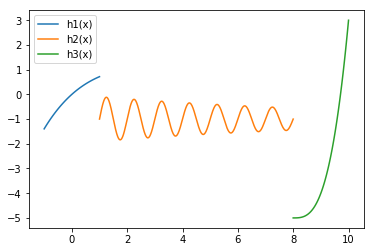

In [10]:
x_1 = np.linspace(-1, 1, 100)
h_1 = x_1 * np.exp((-x_1)/3)
plt.plot(x_1, h_1, label="h1(x)")

x_2 = np.linspace(1, 8, 1000)
h_2 = np.sin(2*m.pi*(x_2)) * np.exp(-(x_2)/10) - 1
plt.plot(x_2, h_2, label="h2(x)")

x_3 = np.linspace(8, 10, 100)
h_3 = (x_3-8) ** 3 - 5
plt.plot(x_3, h_3, label="h3(x)")

plt.legend()
plt.show()

**Exercise 6**

You're playing a game with two friends that involves a dice and two coins. You assign "heads" to have a value of 1, and "tails" a value of 0. Someone rolls the dice, flips the two coins and adds up the total. 

  * You win if the total is less than 1, 3, or 7.
  * Your first friend wins if the total is 4 or 5.
  * Your second friend wins if the total is 2, 6, or 8. 

Is the game fair? If not, who is most likely to win?

---

What would happen if the following scoring system is used instead?
  * You win if the total is 1, 5, or 8.
  * Your first friend wins if the total is 3 or 4.
  * Your second friend wins if the total is 2, 6, or 7.


---

_We want to write a function that simulates one round of the game, and a second function to run a whole bunch of sample rounds_

In [28]:
# going to use three different random methods, though random.randint is obviously the
# best option for all three random calculations

def sample_round():
    """We will return 0 if you win, 1 if your first friend wins, 
    and 2 if your second friend wins"""
    
    # roll a dice
    points = random.randint(1,7)
    ## gives a random integer from [0, 7) (AKA [0, 6])
    
    # flip two coins
    flip_1 = random.random()
    ## gives a random float from [0, 1)
    ## this is equivalent to random.sample()
    if flip_1 < 0.5:
        points += 0
    else: 
        points += 1
    
    flip_2 = random.choice([0, 1])
    ## gives 0 or 1
    points += flip_2
    
    # who wins?
    if points == 1 or points == 5 or points == 8:
        return 0
    elif 3 <= points <= 4:
        return 1
    else:
        return 2
    
def simulate(num_rounds):
    """num_rounds is the number of desired rounds
    returns a list of the form [a, b, c] where a is the number of times you win,
    b is the number of times your first friend wins, and c is the number
    of times your second friend wins"""
    
    win_total = [0, 0, 0]
    for i in range(num_rounds):
        winner = sample_round()
        win_total[winner] += 1
    
    # create a pie chart
    plt.pie(win_total, labels=['you', 'friend 1', 'friend 2'], autopct='%.2f')
    
    plt.show()

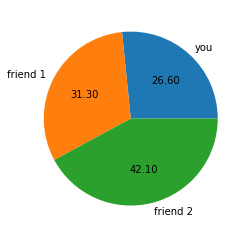

In [29]:
simulate(1000)